In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal

In [4]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *

In [25]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [15]:
Index = np.arange(1,36+1) 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/HPC_Age_230105/'
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
for target in Targets:
    i_find = target.index('=')
    book_name_xlsx = target[0:i_find] + '.xlsx'
    for k in Index:
        old_book = str(k) + '_' + book_name_xlsx
        #print(old_book)
        #open excel:
        try:   # use try just in case some cases fail
            data_old = openpyxl.load_workbook(BasicPath + target +'/' + old_book)   
            data_tar = openpyxl.load_workbook(BasicPath + target +'/' + book_name_xlsx) 

            table_old = data_old[str(k)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            tar_sheet_name_xlsx = 'Results';
            table_tar = data_tar[tar_sheet_name_xlsx]
            nrows_tar = table_tar.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)

            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                for j in range(1, len(list_old[i-1])+1):
                    #print(i,j,list_old[i-1][j-1]    )
                    table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(BasicPath + target +'/' + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {k} for folder {target}!")
        else:
            print(f"Successfuly write results for Scan {k} for folder {target}!") 


Successfuly write results for Scan 1 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 2 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 3 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 4 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 5 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 6 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 7 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 8 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 9 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 10 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 11 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 12 for folder Andrew_int=6e-19_2000_chi!
Successfuly write results for Scan 13 for folder Andrew_int=6e-19_2000_chi!
Successfuly write res

In [16]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/HPC_Age_230105/' 
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
Scan_Num = [36,36,36,    36,36,36]
HPC_Age_230105 = {}
for target,scan_num in zip(Targets,Scan_Num):
    HPC_Age_230105[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        HPC_Age_230105[target][str(scan)]={}
        try:
            HPC_Age_230105[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "th Scan/" 
            + str(scan)+ "th Scan-for_AGE_only.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

Nothing in Constant_sol=3e-20_2000_chi, Scan 9


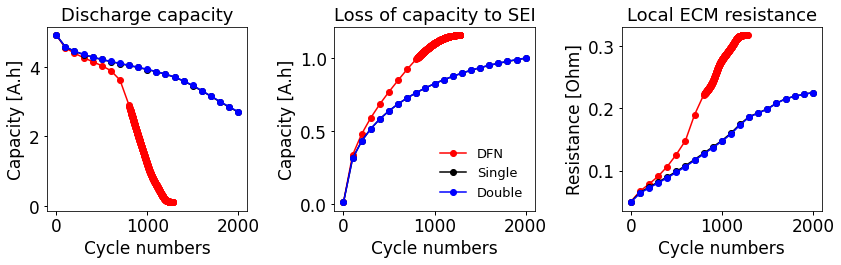

In [141]:
target = "Constant_sol=3e-20_2000_chi"; dpi=300
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Labels = ["DFN","Single","Double",]
Scans = [1,13,25]; kIndex = np.arange(0,3);
fig, axs = plt.subplots(1,3, figsize=(12,4),tight_layout=True)
for Scan_i,k in zip(Scans,kIndex):
    axs[0].plot(
        HPC_Age_230105[target][str(Scan_i)]["Full_cycle"][0], 
        HPC_Age_230105[target][str(Scan_i)]["Discharge capacity [A.h]"][0],
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[1].plot(
        HPC_Age_230105[target][str(Scan_i)]["Full_cycle"][0], 
        HPC_Age_230105[target][str(Scan_i)]["CDend Loss of capacity to SEI [A.h]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[2].plot(
        HPC_Age_230105[target][str(Scan_i)]["Full_cycle"][0], 
        HPC_Age_230105[target][str(Scan_i)]["CDend Local ECM resistance [Ohm]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for i in range(0,3):
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[1].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    plt.savefig(BasicPath +   target+ "Lande_1_LDx.png", dpi=dpi)

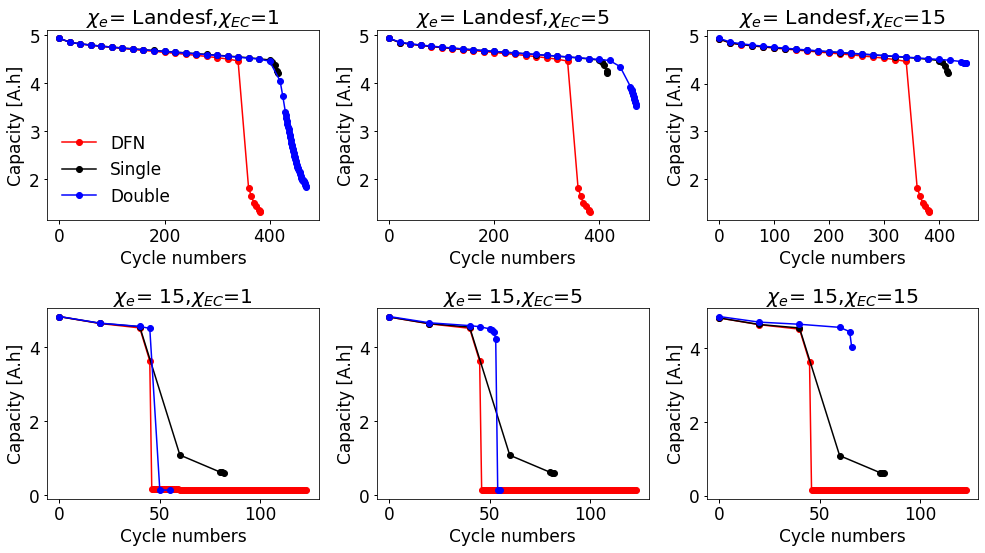

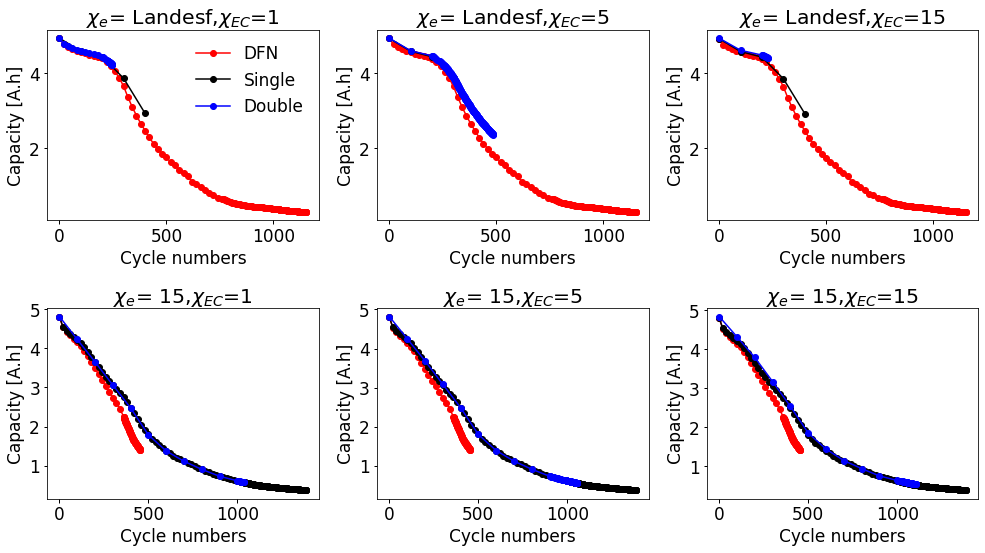

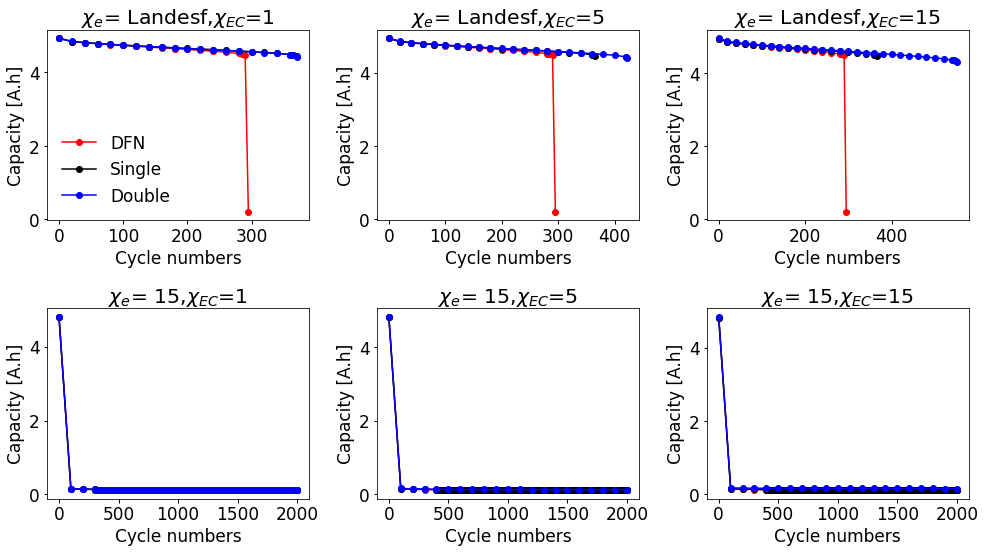

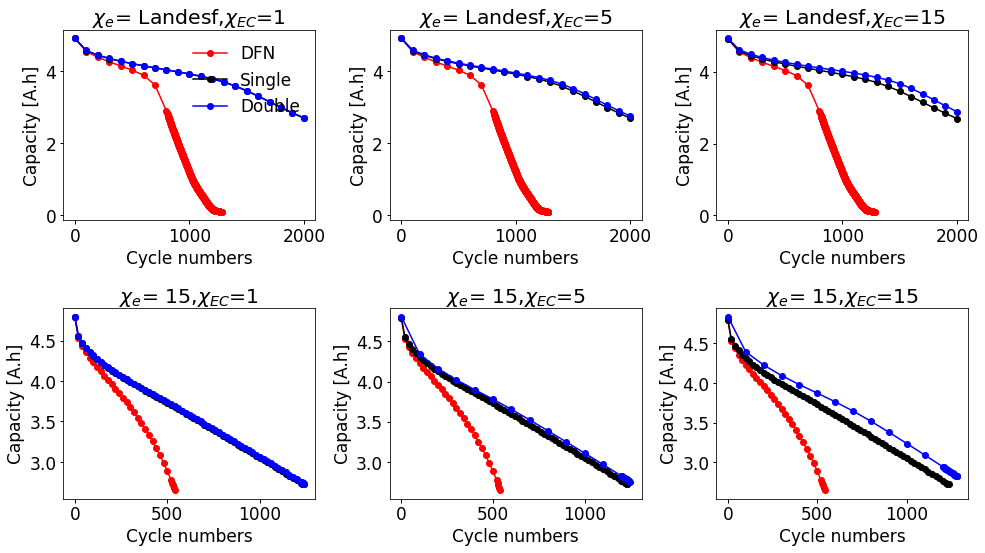

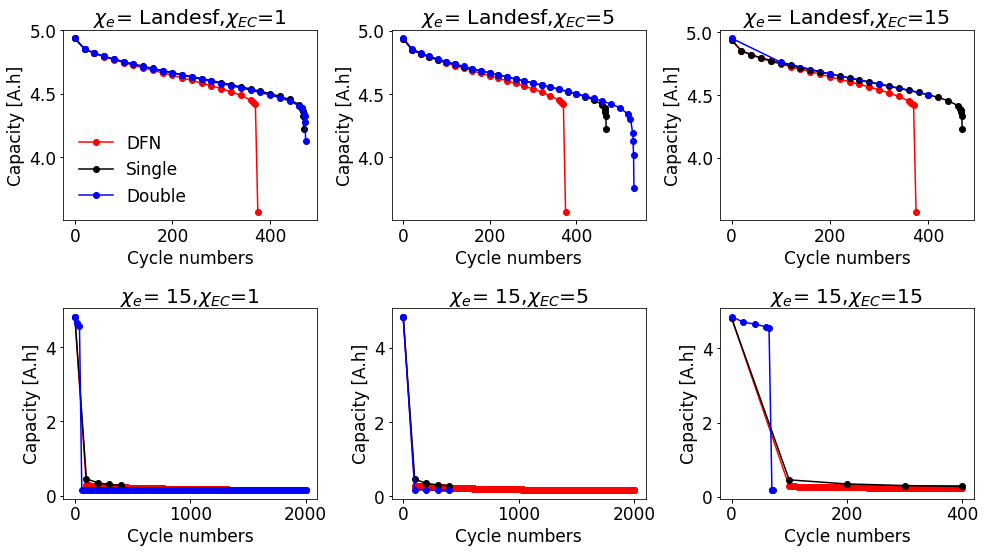

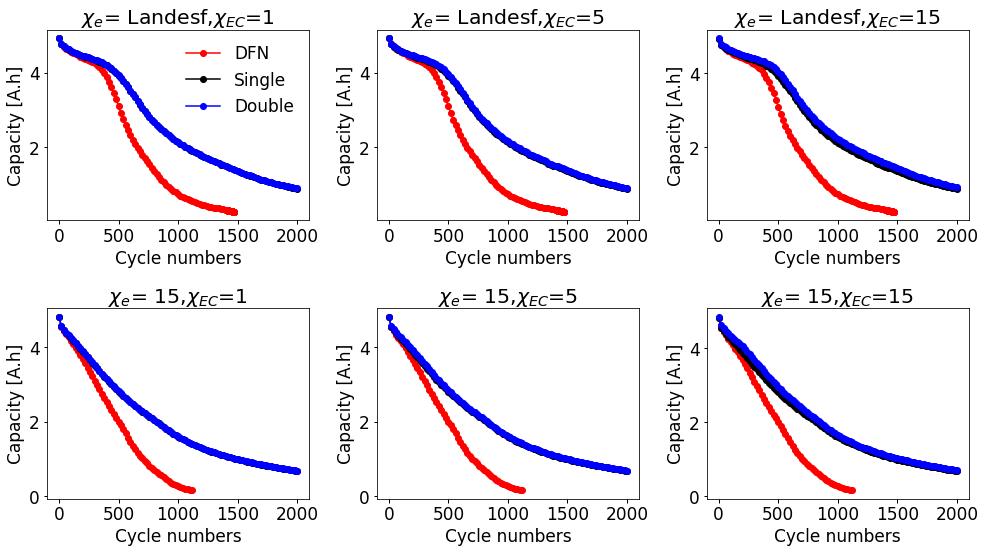

In [53]:
# 
# [0,0]: Landes-1-3models  - 1-13-25
# [0,1]: Landes-5-3models  - 2-14-26
# [0,2]: Landes-15-3models - 3-15-27
# [1,0]: 15-1-3models      - 4-16-28
# [1,1]: 15-5-3models      - 5-17-29
# [1,2]: 15-15-3models     - 6-18-30
target = "Andrew_int=6e-19_2000_chi"; dpi=300
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Labels = ["DFN","Single","Double",]; Str_1 =['Landesf','15'];Str_2=['1','5','15']
Scans = [1,13,25]; kIndex = np.arange(0,3);
for target in Targets:
    fig, axs = plt.subplots(2,3, figsize=(14,8),tight_layout=True)
    for k in range(0,6):
        if k < 3:
            m=0; n =k
        else:
            m=1; n=k-3
        for i in range(0,3):
            #print(f'Index={(k+1+i*12)}')
            axs[m,n].plot(
                HPC_Age_230105[target][str(k+1+i*12)]["Full_cycle"][0], 
                HPC_Age_230105[target][str(k+1+i*12)]["Discharge capacity [A.h]"][0],
                color=Colors[i],marker=Markers[n],linestyle=Linestyles[i],  label=Labels[i])
        axs[m,n].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].tick_params(labelcolor='k', labelsize=fs, width=1)
        
        axs[m,n].set_title(
            r'$\chi_e$'+f'= {Str_1[m]},' + r'$\chi_{EC}$' + f'={Str_2[n]}',
            loc='center')
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
    plt.savefig(BasicPath +   target+ "_LDx_Scan_Chi.png", dpi=dpi)

something went wrong for Constant_sol=3e-20_2000_chi 


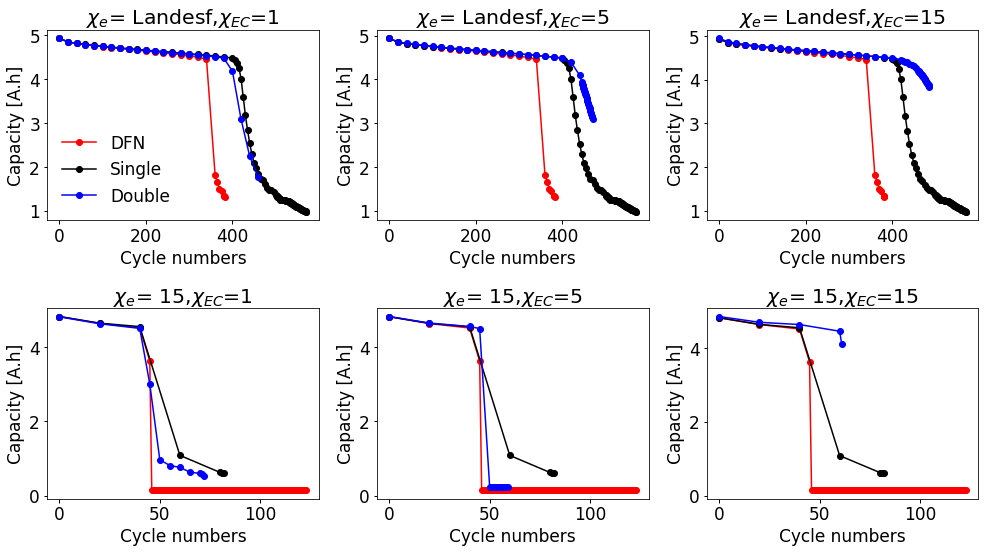

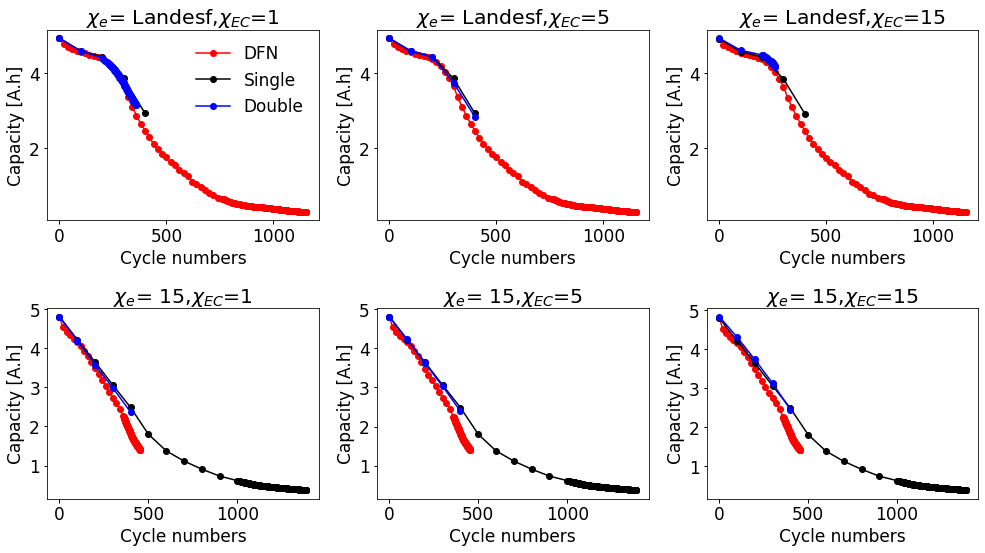

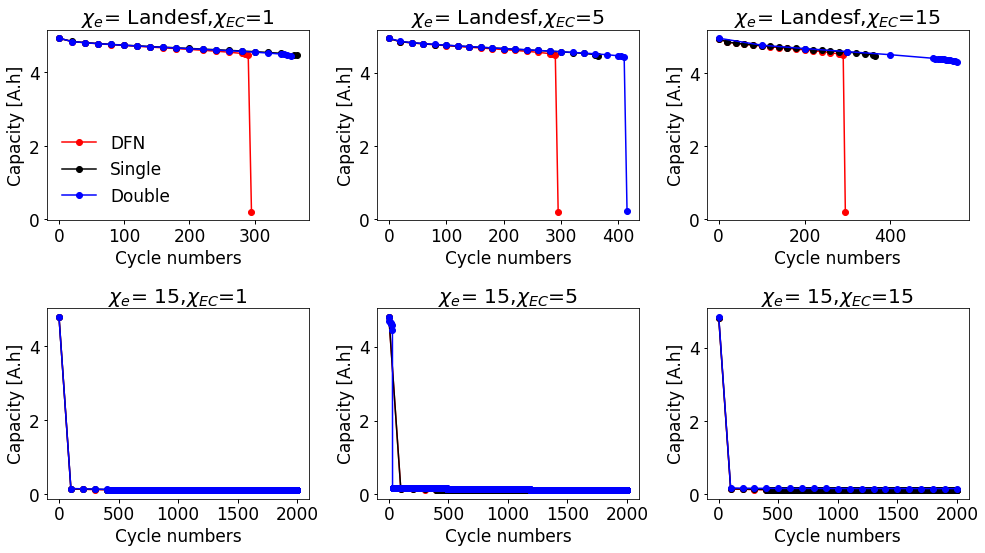

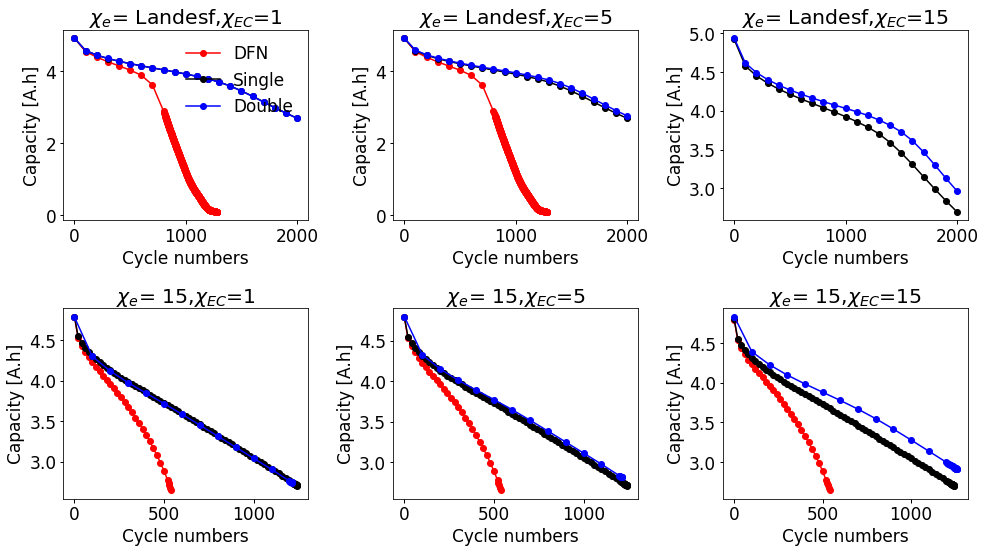

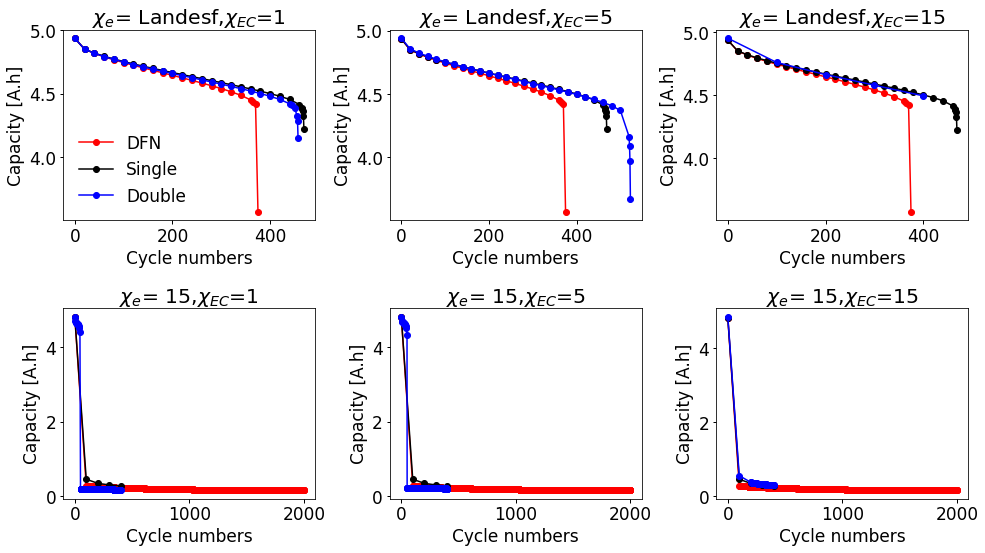

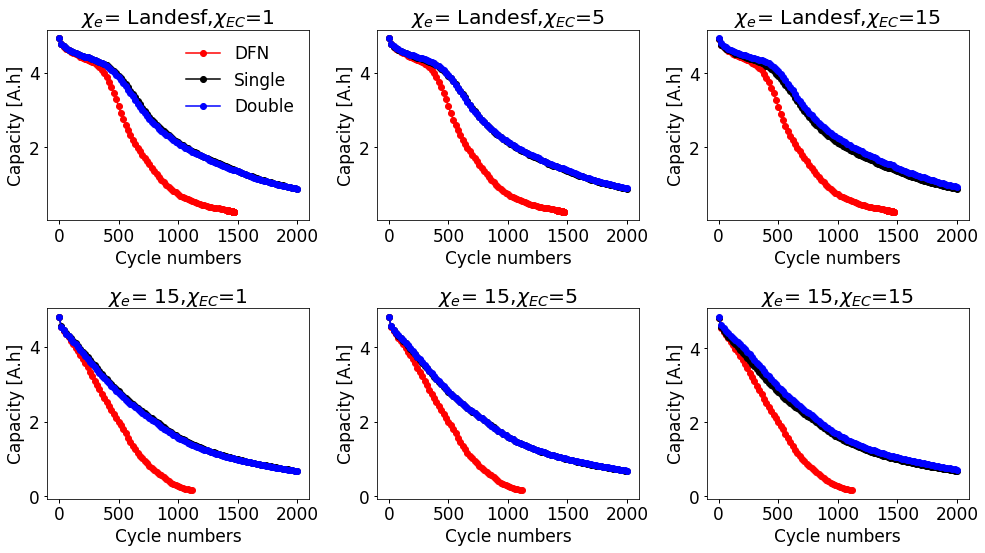

In [56]:
# compare effect of model - others: high Dx   Andrew_int
# [0,0]: Landes-1-3models  - 1-13-25   all + 6 for High Dx
# [0,1]: Landes-5-3models  - 2-14-26
# [0,2]: Landes-15-3models - 3-15-27
# [1,0]: 15-1-3models      - 4-16-28
# [1,1]: 15-5-3models      - 5-17-29
# [1,2]: 15-15-3models     - 6-18-30
target = "Andrew_int=6e-19_2000_chi"; dpi=300
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Labels = ["DFN","Single","Double",]; Str_1 =['Landesf','15'];Str_2=['1','5','15']
Scans = [1,13,25]; kIndex = np.arange(0,3);
for target in Targets:
    fig, axs = plt.subplots(2,3, figsize=(14,8),tight_layout=True)
    for k in range(0,6):
        if k < 3:
            m=0; n =k
        else:
            m=1; n=k-3
        for i in range(0,3):
            #print(f'Index={(k+1+i*12)}')
            try:
                axs[m,n].plot(
                    HPC_Age_230105[target][str(k+1+i*12+6)]["Full_cycle"][0], 
                    HPC_Age_230105[target][str(k+1+i*12+6)]["Discharge capacity [A.h]"][0],
                    color=Colors[i],marker=Markers[n],linestyle=Linestyles[i],  label=Labels[i])
            except:
                print(f'something went wrong for {target} ')
            else:
                pass
        axs[m,n].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].tick_params(labelcolor='k', labelsize=fs, width=1)
        
        axs[m,n].set_title(
            r'$\chi_e$'+f'= {Str_1[m]},' + r'$\chi_{EC}$' + f'={Str_2[n]}',
            loc='center')
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
    plt.savefig(BasicPath +   target+ "_HDx_Scan_Chi.png", dpi=dpi)

something went wrong


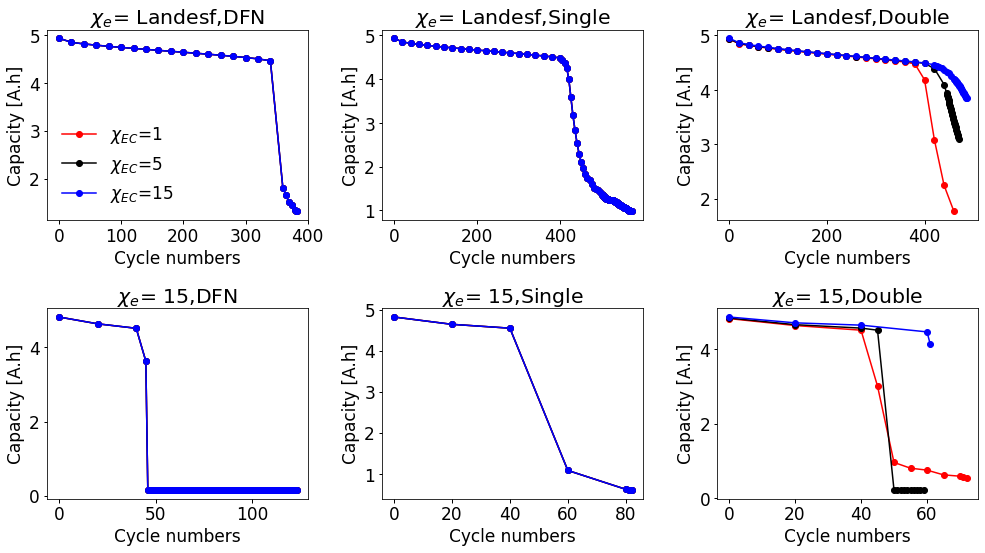

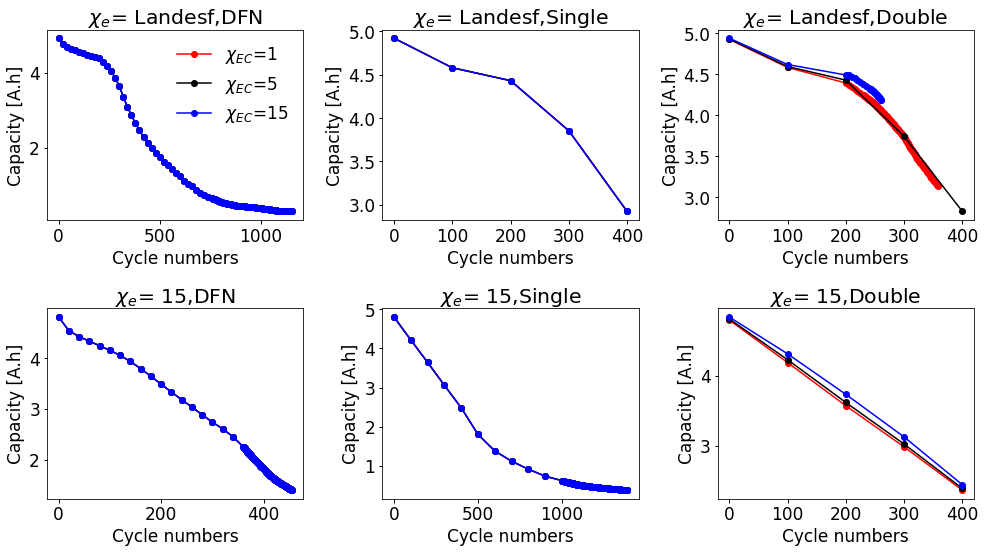

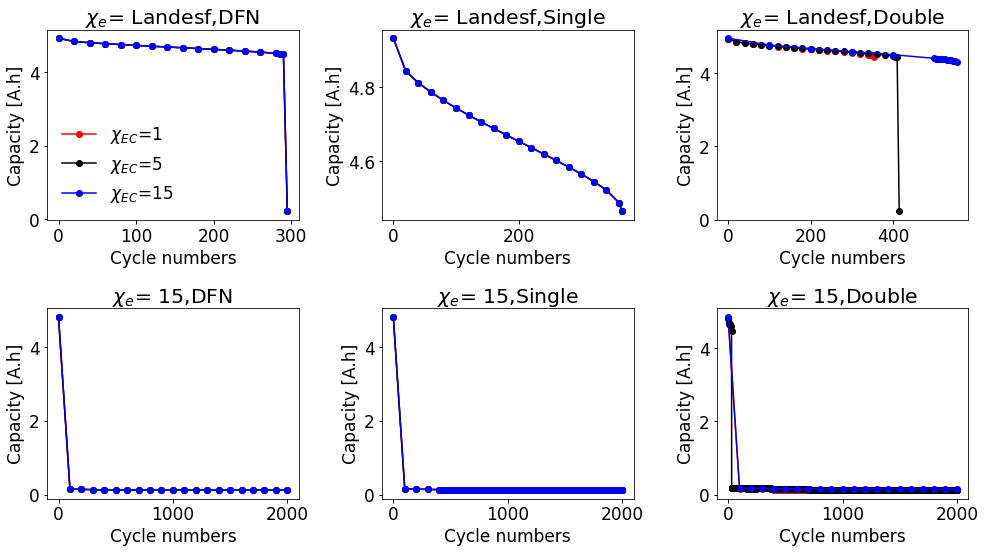

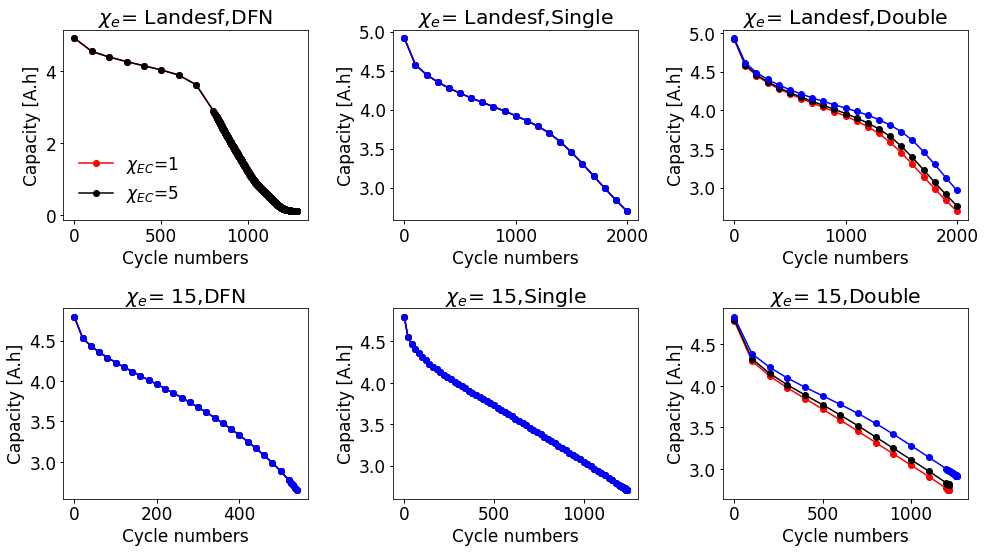

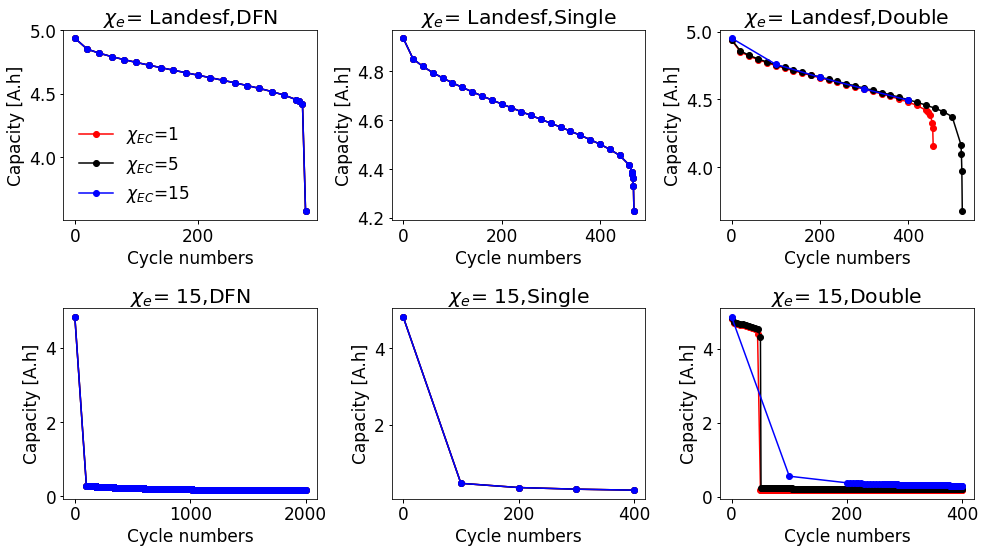

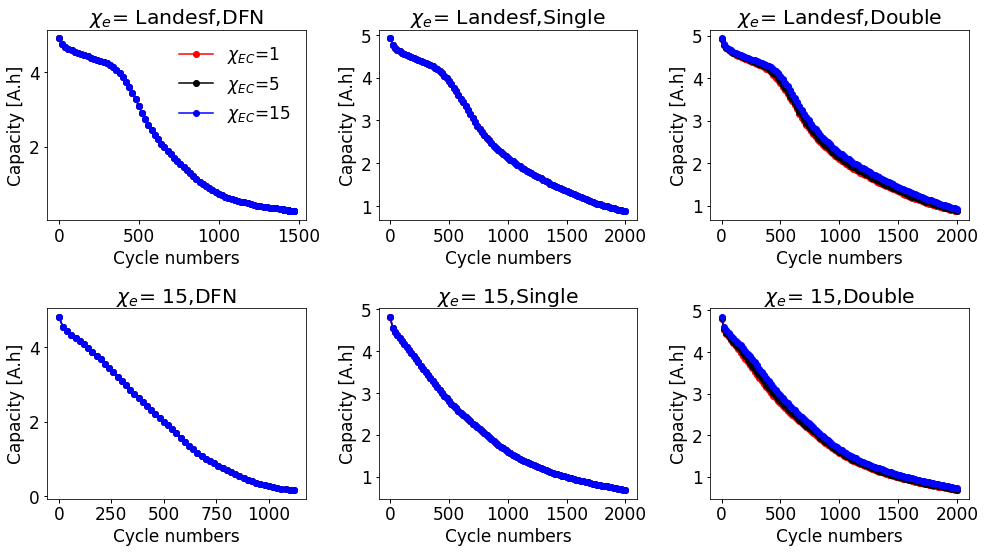

In [52]:
# compare effect of chiEC - others: high Dx   Andrew_int
# [0,0]: Landes-DFN-3-chiEC  -    1 2 3     all + 6 for High Dx
# [0,1]: Landes-Single-3-chiEC  - 13,14,15
# [0,2]: Landes-Double-3-chiEC -  25,26,27
# [1,0]: 15-DFN-3-chiEC      -    4,5,6
# [1,1]: 15-Single-3-chiEC      - 16,17,18
# [1,2]: 15-Double-3-chiEC     -  28,29,30
target = "Andrew_int=6e-19_2000_chi"; dpi=300
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Labels = ["DFN","Single","Double",]; Str_1 =['Landesf','15'];Str_2=['1','5','15']
for target in Targets:
    fig, axs = plt.subplots(2,3, figsize=(14,8),tight_layout=True)
    for k in range(0,6):
        if k < 3:
            m=0; n =k
        else:
            m=1; n=k-3
        for i in range(0,3):
            #print(f'Index={(i+1+n*12+m*3)}')
            try:
                axs[m,n].plot(
                    HPC_Age_230105[target][str(i+1+n*12+m*3+6)]["Full_cycle"][0], 
                    HPC_Age_230105[target][str(i+1+n*12+m*3+6)]["Discharge capacity [A.h]"][0],
                    color=Colors[i],marker=Markers[i],linestyle=Linestyles[i],  
                    label=r'$\chi_{EC}$' + f'={Str_2[i]}')
            except:
                print('something went wrong')
            else:
                pass
        axs[m,n].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].tick_params(labelcolor='k', labelsize=fs, width=1)
        
        axs[m,n].set_title(
            r'$\chi_e$'+f'= {Str_1[m]},' + Labels[n],
            loc='center')
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
    plt.savefig(BasicPath +   target+ "_HDx_Scan_model.png", dpi=dpi)

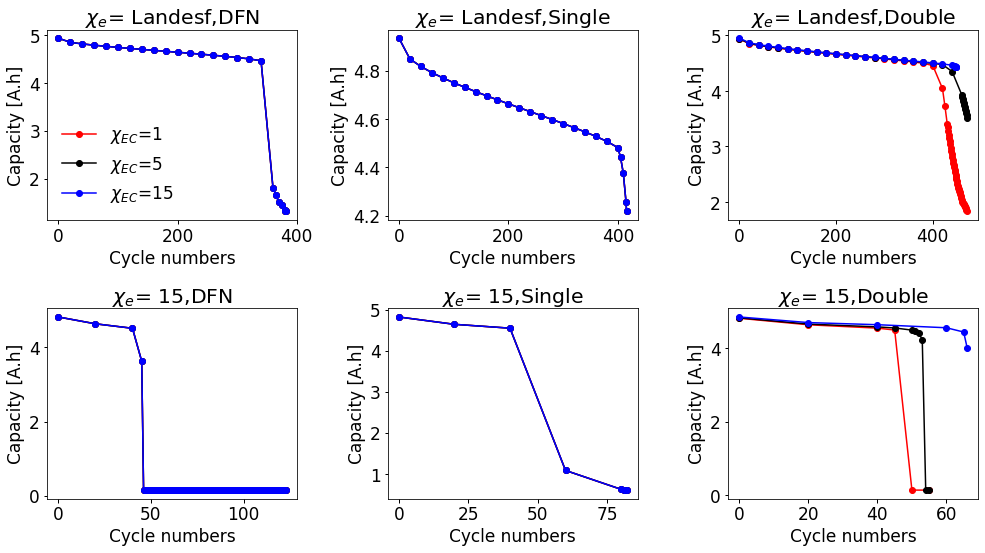

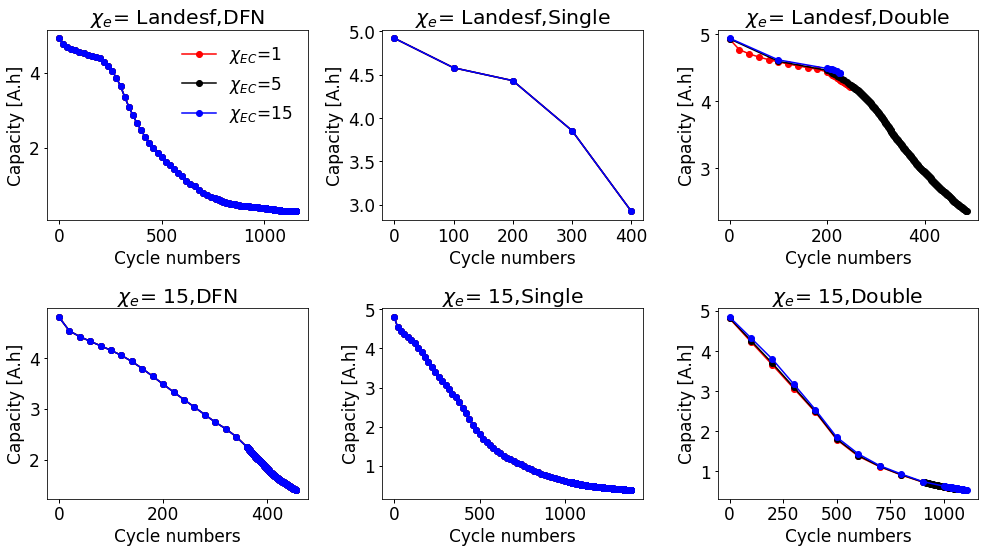

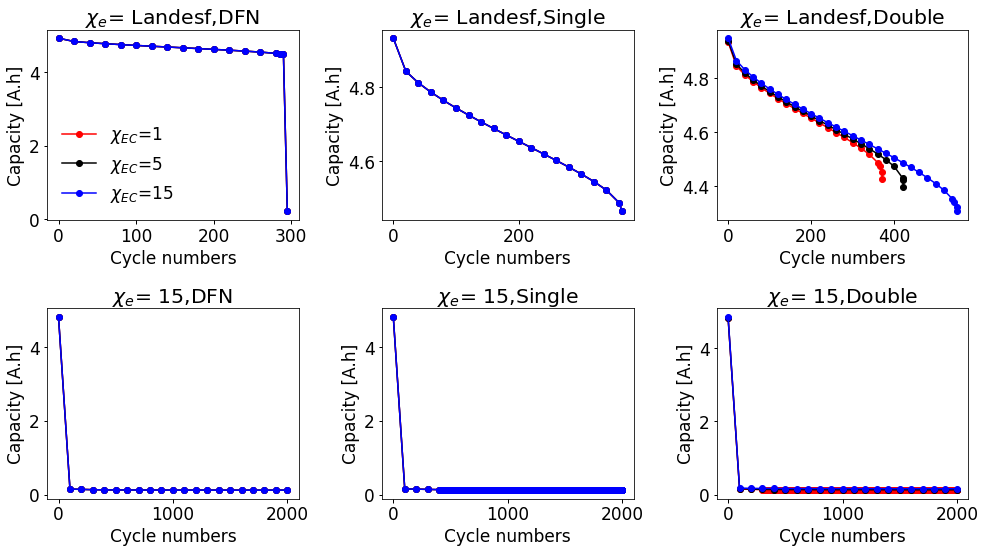

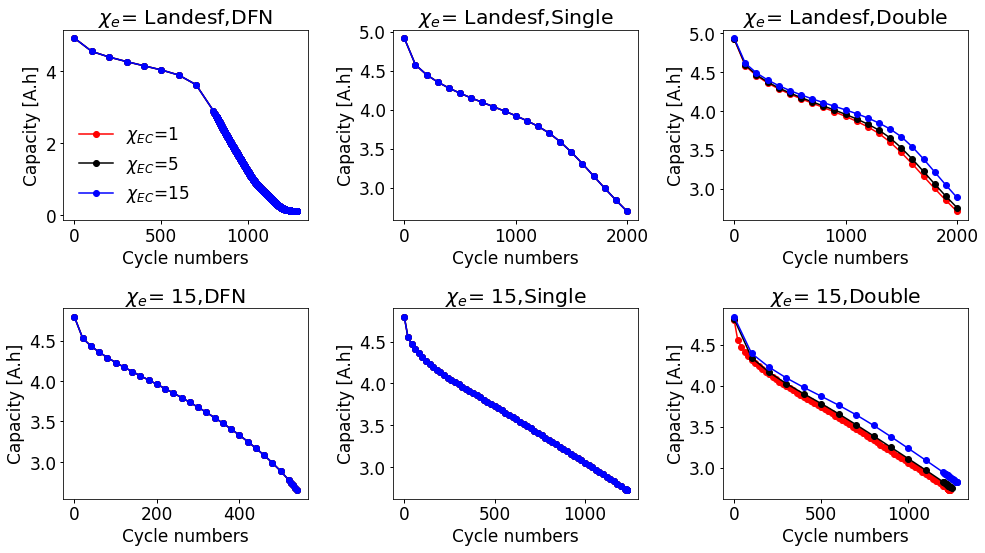

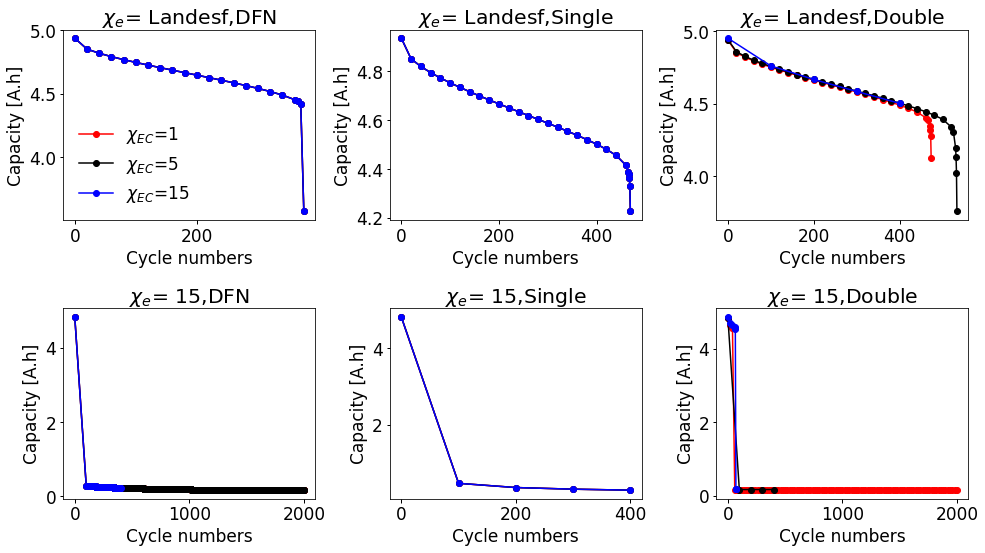

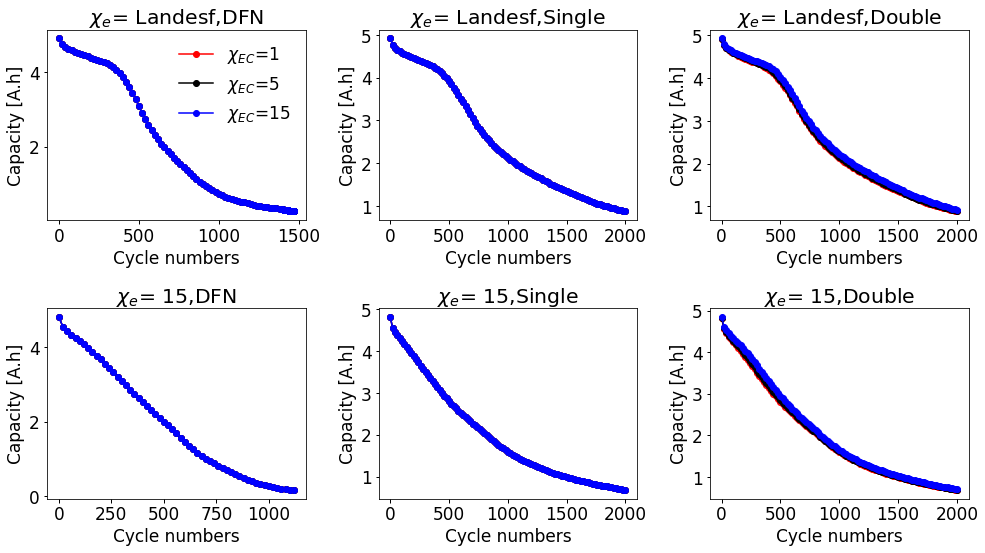

In [49]:
# compare effect of chiEC - others: low Dx   Andrew_int
# [0,0]: Landes-DFN-3-chiEC  -    1 2 3
# [0,1]: Landes-Single-3-chiEC  - 13,14,15
# [0,2]: Landes-Double-3-chiEC -  25,26,27
# [1,0]: 15-DFN-3-chiEC      -    4,5,6
# [1,1]: 15-Single-3-chiEC      - 16,17,18
# [1,2]: 15-Double-3-chiEC     -  28,29,30
target = "Andrew_int=6e-19_2000_chi"; dpi=300
Targets = [
    "Andrew_int=6e-19_2000_chi","Andrew_sol=3e-20_2000_chi",
    "Constant_int=6e-19_2000_chi","Constant_sol=3e-20_2000_chi",
    "Valoen_int=6e-19_2000_chi","Valoen_sol=3e-20_2000_chi"
    ]
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Labels = ["DFN","Single","Double",]; Str_1 =['Landesf','15'];Str_2=['1','5','15']
for target in Targets:
    fig, axs = plt.subplots(2,3, figsize=(14,8),tight_layout=True)
    for k in range(0,6):
        if k < 3:
            m=0; n =k
        else:
            m=1; n=k-3
        for i in range(0,3):
            #print(f'Index={(i+1+n*12+m*3)}')
            axs[m,n].plot(
                HPC_Age_230105[target][str(i+1+n*12+m*3)]["Full_cycle"][0], 
                HPC_Age_230105[target][str(i+1+n*12+m*3)]["Discharge capacity [A.h]"][0],
                color=Colors[i],marker=Markers[i],linestyle=Linestyles[i],  
                label=r'$\chi_{EC}$' + f'={Str_2[i]}')
        axs[m,n].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].tick_params(labelcolor='k', labelsize=fs, width=1)
        
        axs[m,n].set_title(
            r'$\chi_e$'+f'= {Str_1[m]},' + Labels[n],
            loc='center')
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
    plt.savefig(BasicPath +   target+ "_LDx_Scan_model.png", dpi=dpi)

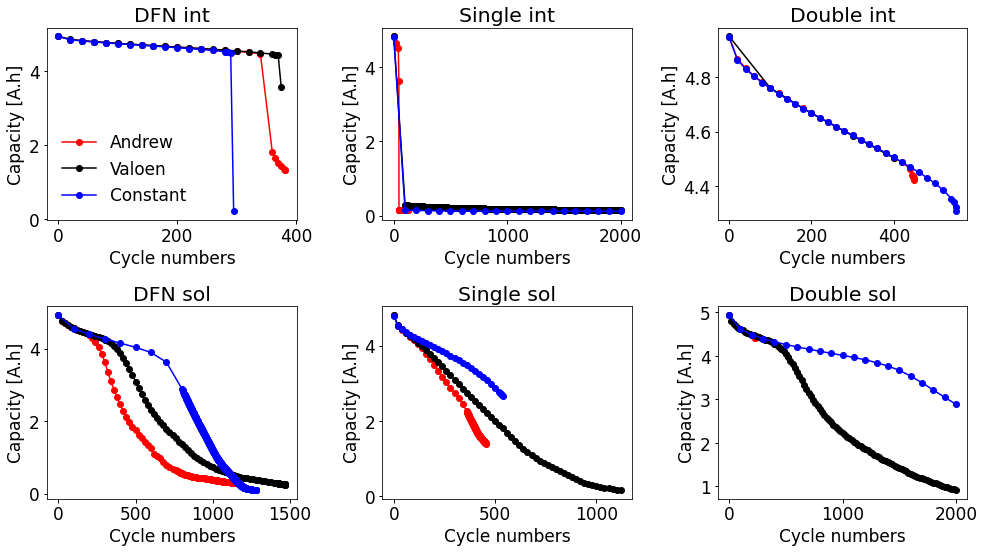

In [59]:
# compare effect of elely and model outside is chi_e and chi_EC  low Dx
# 
# [0,0]: DFN int -    Andrew, Valoen Constant    [Landes-1]- 1 [Landes-5]- 2 [Landes-15]- 3
# [0,1]: single int -    Andrew, Valoen Constant [Landes-1]- 13 [Landes-5]- 14 [Landes-15]- 15
# [0,1]: double int -    Andrew, Valoen Constant [Landes-1]- 25 [Landes-5]- 26 [Landes-15]- 27
# [1,0]: DFN sol -    Andrew, Valoen Constant    [Landes-1]- 1 [Landes-5]- 2 [Landes-15]- 3
# [1,1]: single sol -    Andrew, Valoen Constant [Landes-1]- 13 [Landes-5]- 14 [Landes-15]- 15
# [1,2]: double sol -    Andrew, Valoen Constant [Landes-1]- 25 [Landes-5]- 26 [Landes-15]- 27
dpi=300
Targets = [
    "Andrew_int=6e-19_2000_chi","Valoen_int=6e-19_2000_chi","Constant_int=6e-19_2000_chi",
    "Andrew_sol=3e-20_2000_chi","Valoen_sol=3e-20_2000_chi","Constant_sol=3e-20_2000_chi",
    ]
Colors    = ["r","k","b"];Markers   = ["o","o","o"];Linestyles= ["-","-","-"]
Titles = ["DFN","Single","Double",]; Str_1 =['int','sol'];Scans=[1,3,25]
Labels = ['Andrew','Valoen','Constant']
fig, axs = plt.subplots(2,3, figsize=(14,8),tight_layout=True)
for m in range(0,2):
    for n in range(0,3):
        for k in range(0,3):
        #print(f'Index={(i+1+n*12+m*3)}')
            axs[m,n].plot(
                HPC_Age_230105[Targets[k+m*3]][str(Scans[n]+2)]["Full_cycle"][0], 
                HPC_Age_230105[Targets[k+m*3]][str(Scans[n]+2)]["Discharge capacity [A.h]"][0],
                color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  
                label=Labels[k])    # r'$\chi_{EC}$' + f'={Str_2[i]}'
        axs[m,n].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].tick_params(labelcolor='k', labelsize=fs, width=1)
        
        axs[m,n].set_title(
            Titles[n] + ' ' + Str_1[m],
            loc='center')
axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
#plt.savefig(BasicPath +   target+ "_LDx_Scan_model.png", dpi=dpi)

In [136]:
# Why rollover failure – closer look – at same cyc No. 
# Valoen-int - Scan No. 2-14-26
target = "Constant_sol=3e-20_2000_chi" # chi-Lande_1  LDx (Dx=1e-12) - 1 13 25
Dict_DFN = HPC_Age_230105[target]['1']
Dict_Sin = HPC_Age_230105[target]['13']
Dict_Dou = HPC_Age_230105[target]['25']
Dict_All = [Dict_DFN,Dict_Sin,Dict_Dou];
for dict in Dict_All:
    print(dict["Discharge capacity [A.h]"][0][2])

4.392676537575198
4.448991812742406
4.451703516195266


In [111]:
print((4.521250004892693 - 4.438564502722386) / 4.438564502722386 *100)
print(f'Compare Cycle No. {Dict_Dou["Full_cycle"][0][19]}')

1.8628883757257957
Compare Cycle No. 380


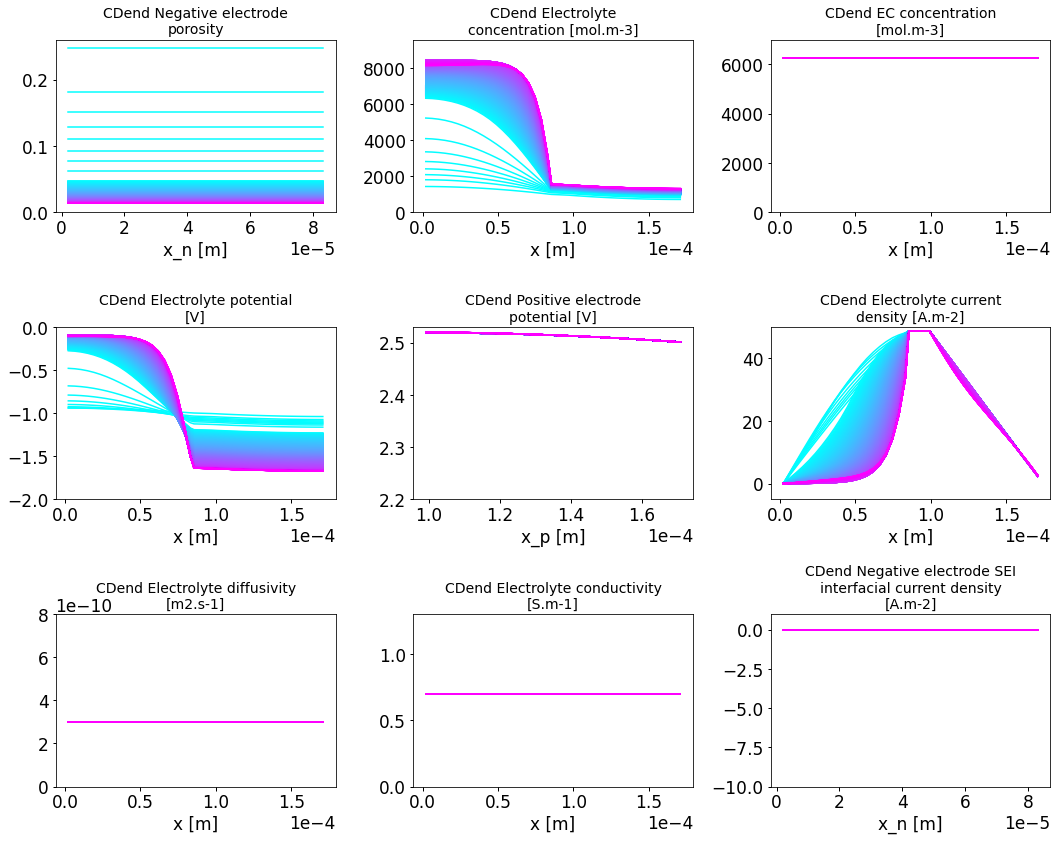

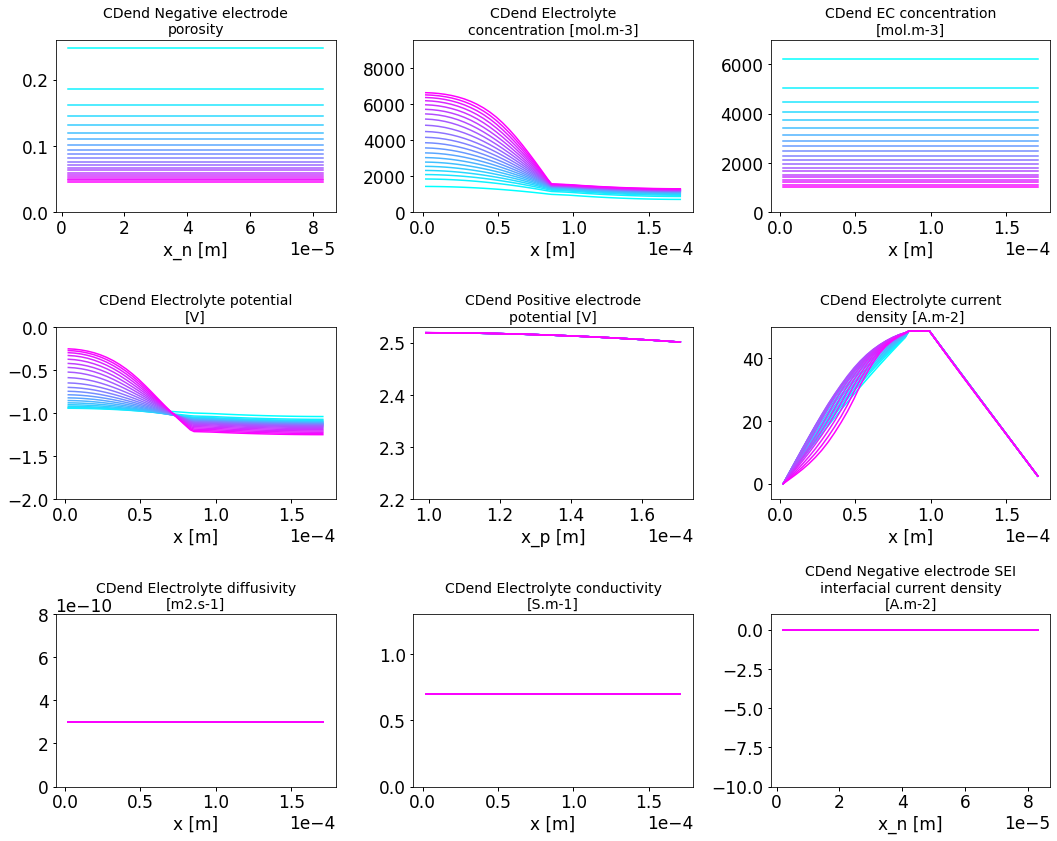

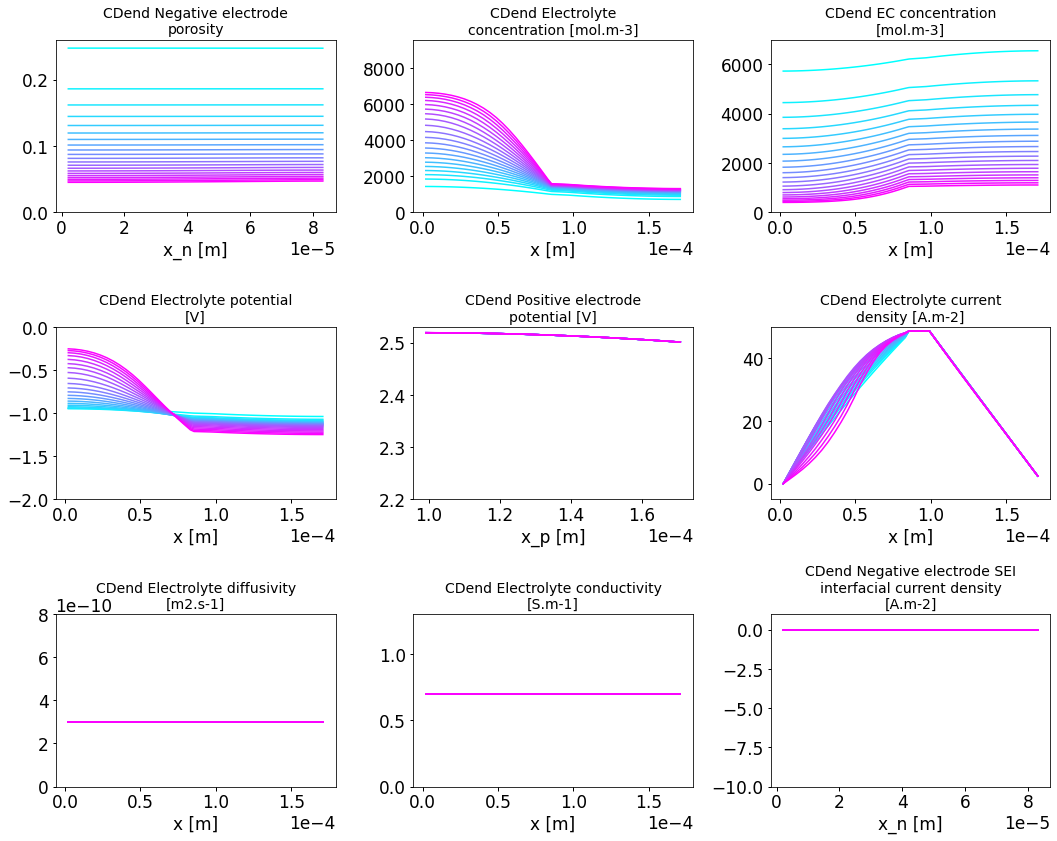

In [144]:
# first, plot porosity change and others at every points:
key_all_CDend = [
    "CDend Negative electrode porosity",
    "CDend Electrolyte concentration [mol.m-3]",
    "CDend EC concentration [mol.m-3]",
    "CDend Electrolyte potential [V]",
    "CDend Positive electrode potential [V]",
    "CDend Electrolyte current density [A.m-2]",
    "CDend Electrolyte diffusivity [m2.s-1]",
    "CDend Electrolyte conductivity [S.m-1]",
    "CDend Negative electrode SEI interfacial current density [A.m-2]",
];
key_all = key_all_CDend;   
#def Plot_Loc_Var_2( Full_cycle, key_all, my_dict,fs): # for my_dict only
font = {'family' : 'DejaVu Sans','size': fs}
mpl.rc('font', **font)
Titles = ["DFN","Single","Double",];
for m in range(0,3):
    my_dict = Dict_All[m]; Full_cycle = my_dict["Full_cycle"][0]; colormap='cool'
    fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
    count_i = 0; 
    for i in range(0,3):
        for j in range(0,3):
            key_ij = key_all[count_i]; count_i += 1
            if 'Negative' in key_ij or 'negative' in key_ij:
                x_loc = "x_n [m]";
            elif 'Positive' in key_ij or 'positive' in key_ij:
                x_loc = "x_p [m]";
            elif 'Seperator' in key_ij or 'seperator' in key_ij:
                x_loc = "x_s [m]";
            else:
                x_loc = "x [m]";
            L_Num= len(my_dict[ key_ij ] )
            #print(f"Total line number is: {L_Num}")
            cmap_i = mpl.cm.get_cmap(colormap, L_Num) 
            X_Len = min(len(my_dict[x_loc][0]),len(my_dict[ key_ij ][0]))
            for k in range(0,L_Num):
                axs[i,j].plot(
                    my_dict[x_loc][0][0:X_Len], 
                    my_dict[ key_ij ][k][0:X_Len],
                    '-',color=cmap_i(k),)
            axs[i,j].set_title(
                "\n".join(wrap(key_ij, 30)) # to be adjusted
                ,   fontdict={'family':'DejaVu Sans','size':fs-3})
            #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].ticklabel_format( 
                axis='x', style='sci',scilimits=[-0.01,0.01], 
                useOffset=None, useLocale=None, useMathText=None)
            #axs[i,j].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[0,0].set_ylim(0,0.26); axs[0,1].set_ylim(0,9600);  axs[0,2].set_ylim(0,7000);
    axs[1,0].set_ylim(-2.0,-0.0); axs[1,1].set_ylim(2.2,2.53);  axs[1,2].set_ylim(-5,50);
    axs[2,0].set_ylim(0,8e-10); axs[2,1].set_ylim(0,1.3);  axs[2,2].set_ylim(-10,1);
    plt.savefig(BasicPath +   'Constant_sol' +Titles[m]+ "Fig. 2 - CDend Loc based overall.png", dpi=dpi)


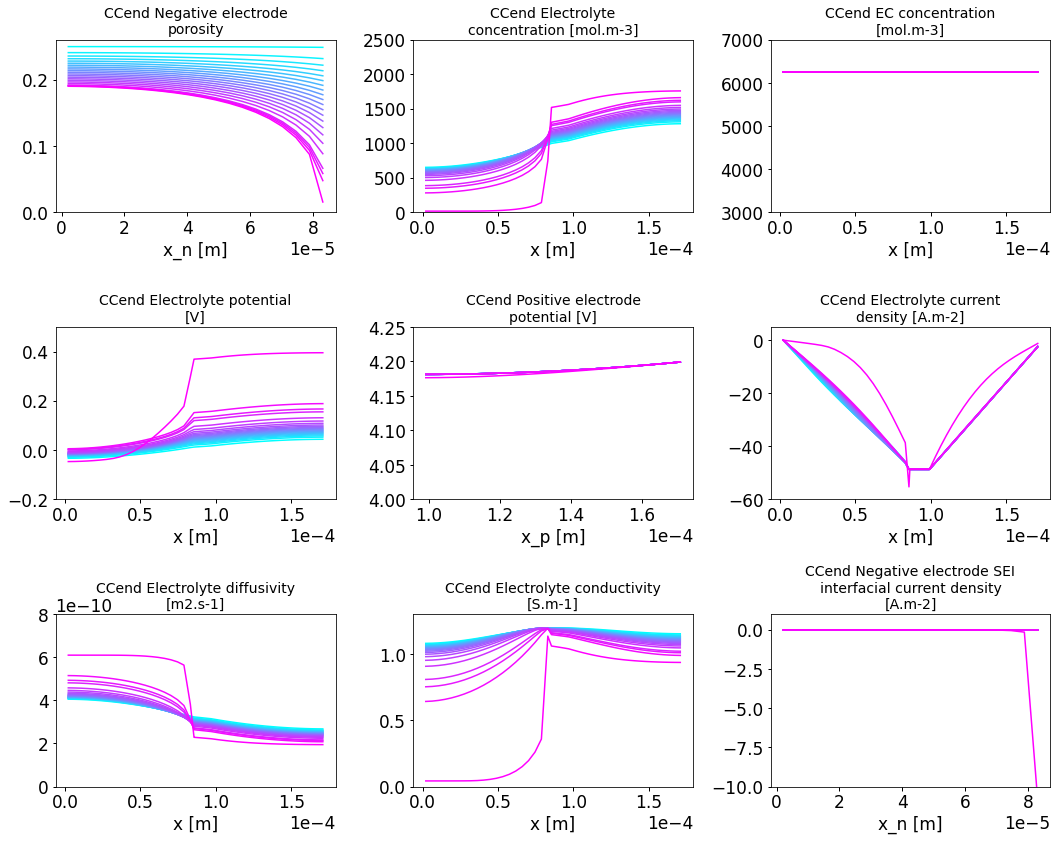

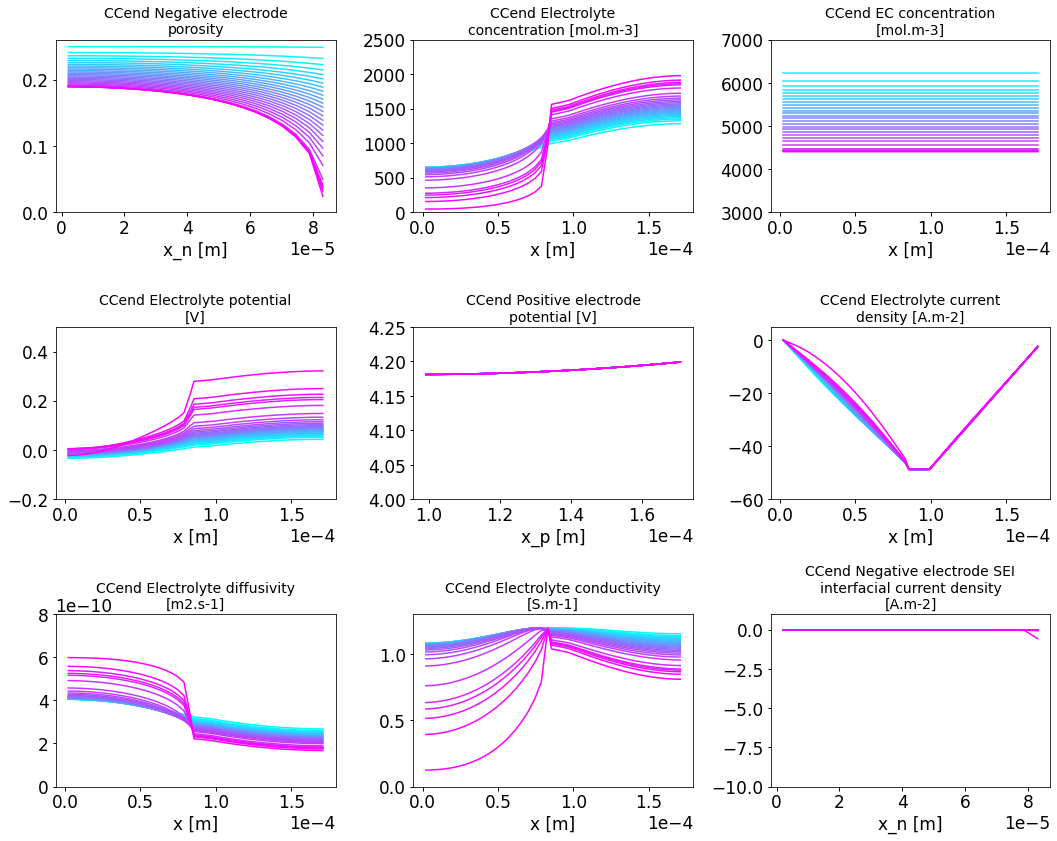

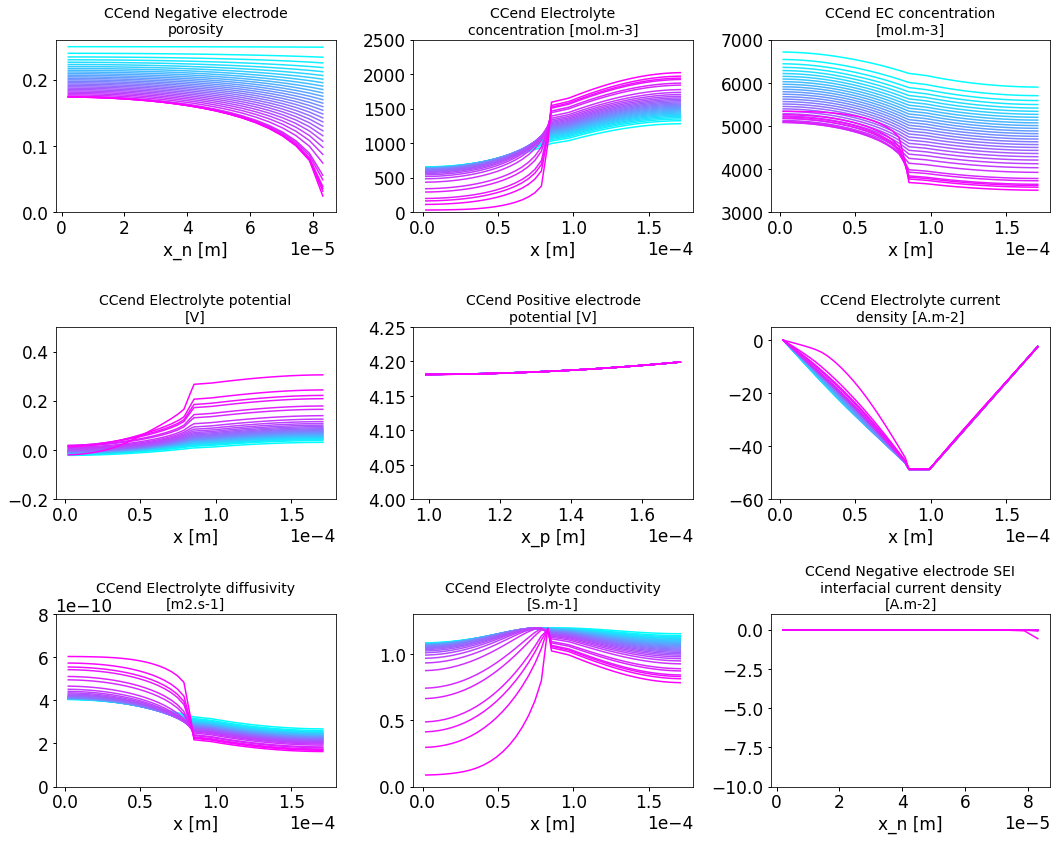

In [88]:
# first, plot porosity change and others at every points:
key_all_CCend = [
    "CCend Negative electrode porosity",
    "CCend Electrolyte concentration [mol.m-3]",
    "CCend EC concentration [mol.m-3]",
    "CCend Electrolyte potential [V]",
    "CCend Positive electrode potential [V]",
    "CCend Electrolyte current density [A.m-2]",
    "CCend Electrolyte diffusivity [m2.s-1]",
    "CCend Electrolyte conductivity [S.m-1]",
    "CCend Negative electrode SEI interfacial current density [A.m-2]",
]
key_all = key_all_CCend;   
#def Plot_Loc_Var_2( Full_cycle, key_all, my_dict,fs): # for my_dict only
font = {'family' : 'DejaVu Sans','size': fs}
mpl.rc('font', **font)
Titles = ["DFN","Single","Double",];
for m in range(0,3):
    my_dict = Dict_All[m]; Full_cycle = my_dict["Full_cycle"][0]; colormap='cool'
    fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
    count_i = 0; 
    for i in range(0,3):
        for j in range(0,3):
            key_ij = key_all[count_i]; count_i += 1
            if 'Negative' in key_ij or 'negative' in key_ij:
                x_loc = "x_n [m]";
            elif 'Positive' in key_ij or 'positive' in key_ij:
                x_loc = "x_p [m]";
            elif 'Seperator' in key_ij or 'seperator' in key_ij:
                x_loc = "x_s [m]";
            else:
                x_loc = "x [m]";
            L_Num= len(my_dict[ key_ij ] )
            #print(f"Total line number is: {L_Num}")
            cmap_i = mpl.cm.get_cmap(colormap, L_Num) 
            X_Len = min(len(my_dict[x_loc][0]),len(my_dict[ key_ij ][0]))
            for k in range(0,L_Num):
                axs[i,j].plot(
                    my_dict[x_loc][0][0:X_Len], 
                    my_dict[ key_ij ][k][0:X_Len],
                    '-',color=cmap_i(k),)
            axs[i,j].set_title(
                "\n".join(wrap(key_ij, 30)) # to be adjusted
                ,   fontdict={'family':'DejaVu Sans','size':fs-3})
            #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].ticklabel_format( 
                axis='x', style='sci',scilimits=[-0.01,0.01], 
                useOffset=None, useLocale=None, useMathText=None)
            #axs[i,j].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[0,0].set_ylim(0,0.26); axs[0,1].set_ylim(0,2500);  axs[0,2].set_ylim(3000,7000);
    axs[1,0].set_ylim(-0.2,0.5); axs[1,1].set_ylim(4.0,4.25);  axs[1,2].set_ylim(-60,5);
    axs[2,0].set_ylim(0,8e-10); axs[2,1].set_ylim(0,1.3);  axs[2,2].set_ylim(-10,1);
    plt.savefig(BasicPath +   'Andrew_sol__' +Titles[m]+ "Fig. 2 - CCend Loc based overall.png", dpi=dpi)

In [121]:
def Compare_Models_for_Cycle(Index_comp,key_all,Idir):
    print(f'Compare Cycle No. {Dict_Dou["Full_cycle"][0][Index_comp]}')
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    Titles = ["DFN","Single","Double",]; 
    Colors    = ["r","k","b"]; Markers   = ["o","o","o"];Linestyles= ["-","-","-"]

    fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
    for m in range(0,3):
        my_dict = Dict_All[m]; Full_cycle = my_dict["Full_cycle"][0]; colormap='cool'
        count_i = 0; 
        for i in range(0,3):
            for j in range(0,3):
                key_ij = key_all[count_i]; count_i += 1
                if 'Negative' in key_ij or 'negative' in key_ij:
                    x_loc = "x_n [m]";
                elif 'Positive' in key_ij or 'positive' in key_ij:
                    x_loc = "x_p [m]";
                elif 'Seperator' in key_ij or 'seperator' in key_ij:
                    x_loc = "x_s [m]";
                else:
                    x_loc = "x [m]";
                L_Num= len(my_dict[ key_ij ] )
                #print(f"Total line number is: {L_Num}")
                cmap_i = mpl.cm.get_cmap(colormap, L_Num) 
                X_Len = min(len(my_dict[x_loc][0]),len(my_dict[ key_ij ][0]))
                for k in range(0,L_Num):
                    axs[i,j].plot(
                        my_dict[x_loc][0][0:X_Len], 
                        my_dict[ key_ij ][k][0:X_Len],
                        '-',color=Colors[m],
                        label=Titles[m])
                axs[i,j].set_title(
                    "\n".join(wrap(key_ij, 30)) # to be adjusted
                    ,   fontdict={'family':'DejaVu Sans','size':fs-3})
                #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
                
                labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
                [label.set_fontname('DejaVu Sans') for label in labels]
                
                axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
                axs[i,j].ticklabel_format( 
                    axis='x', style='sci',scilimits=[-0.01,0.01], 
                    useOffset=None, useLocale=None, useMathText=None)  
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
        if Idir == 'CD':
            axs[0,0].set_ylim(0,0.26); axs[0,1].set_ylim(0,6500);  axs[0,2].set_ylim(2500,6600);
            axs[1,0].set_ylim(-1.25,-0.2); axs[1,1].set_ylim(2.5,2.53);  axs[1,2].set_ylim(-5,50);
            axs[2,0].set_ylim(0,8e-10); axs[2,1].set_ylim(0,1.3);  axs[2,2].set_ylim(-2E-2,1E-3);
        else:
            axs[0,0].set_ylim(0,0.26); axs[0,1].set_ylim(0,2500);  axs[0,2].set_ylim(3000,7000);
            axs[1,0].set_ylim(-0.2,0.5); axs[1,1].set_ylim(4.0,4.25);  axs[1,2].set_ylim(-60,5);
            axs[2,0].set_ylim(0,8e-10); axs[2,1].set_ylim(0,1.3);  axs[2,2].set_ylim(-2E-2,1E-3);
        """ plt.savefig(
            BasicPath 
            + 'Valoen-int_Compare Models for Cycle' 
            + str(Dict_Dou["Full_cycle"][0][Index_comp])
            + " " + Idir+"end Loc based.png", dpi=dpi) """


In [191]:
def Compare_Cycs_within_Models(target,ScanNum,key_all,Idir,Index_List,Save):
    my_dict = HPC_Age_230105[target][str(ScanNum)]
    print(f'Compare Cycle No. {my_dict["Full_cycle"][0][Index_List[0]]} to {my_dict["Full_cycle"][0][Index_List[-1]]}')
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    Titles = ["DFN","Single","Double",]; 
    Colors    = ["r","k","b"]; Markers   = ["o","o","o"];Linestyles= ["-","-","-"];
    colormap='jet';
    if len(Index_List)<3:
        co_num = 4;
    else:
        co_num = len(Index_List)  
    gray = mpl.cm.get_cmap("gray", 8) ;cmap_i = mpl.cm.get_cmap(colormap, co_num) 

    fig, axs = plt.subplots(4,3, figsize=(15,16),tight_layout=True)
    Full_cycle = my_dict["Full_cycle"][0]; 
    count_i = 0; k=0;
    axs[0,0].plot(
        Full_cycle, 
        my_dict["Discharge capacity [A.h]"][0],
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k])
    axs[0,0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,1].plot(
        Full_cycle, 
        my_dict["CDend Loss of capacity to SEI [A.h]"][0], 
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k],  )
    axs[0,1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})
    axs[0,2].plot(
        Full_cycle, 
        my_dict["CDend Local ECM resistance [Ohm]"][0], 
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k],  )
    axs[0,2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for m in range(0,len(Index_List)):
        axs[0,0].plot(
            Full_cycle[Index_List[m]], 
            my_dict["Discharge capacity [A.h]"][0][Index_List[m]],
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],
            label='Cyc '+str(Full_cycle[Index_List[m]]))
        axs[0,1].plot(
            Full_cycle[Index_List[m]], 
            my_dict["CDend Loss of capacity to SEI [A.h]"][0][Index_List[m]], 
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],  
            label='Cyc '+str(Full_cycle[Index_List[m]]))
        axs[0,2].plot(
            Full_cycle[Index_List[m]], 
            my_dict["CDend Local ECM resistance [Ohm]"][0][Index_List[m]], 
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],  
            label='Cyc '+str(Full_cycle[Index_List[m]]))
    for i in range(0,3):
        axs[0,i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[0,i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)

    for i in range(1,4):
        for j in range(0,3):
            key_ij = key_all[count_i]; count_i += 1
            if 'Negative' in key_ij or 'negative' in key_ij:
                x_loc = "x_n [m]";
            elif 'Positive' in key_ij or 'positive' in key_ij:
                x_loc = "x_p [m]";
            elif 'Seperator' in key_ij or 'seperator' in key_ij:
                x_loc = "x_s [m]";
            else:
                x_loc = "x [m]";
            L_Num= len(my_dict[ key_ij ] )
            X_Len = min(len(my_dict[x_loc][0]),len(my_dict[ key_ij ][0]))
            for k in range(0,L_Num): # plot background
                if k in Index_List:
                    pass; # print(k)
                else:
                    axs[i,j].plot(
                        my_dict[x_loc][0][0:X_Len], 
                        my_dict[ key_ij ][k][0:X_Len],
                        '-',color=gray(4),)
            for k in range(0,len(Index_List)): # plot main focus
                axs[i,j].plot(
                    my_dict[x_loc][0][0:X_Len], 
                    my_dict[ key_ij ][Index_List[k]][0:X_Len],
                    '-',color=cmap_i(k),
                    label='Cyc '+str(Full_cycle[Index_List[k]]))
            axs[i,j].set_title(
                "\n".join(wrap(key_ij, 30)) # to be adjusted
                ,   fontdict={'family':'DejaVu Sans','size':fs-3})
            #axs[1].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_xlabel(x_loc,   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].ticklabel_format( 
                axis='x', style='sci',scilimits=[-0.01,0.01], 
                useOffset=None, useLocale=None, useMathText=None)  
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    """ if Idir == 'CD':
        axs[1,0].set_ylim(0,0.26); axs[1,1].set_ylim(0,6500);  axs[1,2].set_ylim(2500,7200);
        axs[2,0].set_ylim(-1.25,-0.2); axs[2,1].set_ylim(2.5,2.53);  axs[2,2].set_ylim(-5,50);
        axs[3,0].set_ylim(0,8e-10); axs[3,1].set_ylim(0,1.3); # axs[3,2].set_ylim(-2E-2,1E-3);
    else:
        axs[1,0].set_ylim(0,0.26); axs[1,1].set_ylim(0,2500);  axs[1,2].set_ylim(3000,7000);
        axs[2,0].set_ylim(-0.2,0.5);axs[2,1].set_ylim(4.0,4.25);  axs[2,2].set_ylim(-60,5);
        axs[3,0].set_ylim(0,8e-10); axs[3,1].set_ylim(0,1.3); # axs[3,2].set_ylim(-2E-2,1E-3); """
    if Save == True:
        plt.savefig(
            BasicPath  + target
            + '_Compare_Cycs_within_Models for scan No.' + str(ScanNum)
            + ' from Cyc'  + str(Full_cycle[Index_List[0]]) 
            + ' to ' + str(Full_cycle[Index_List[-1]]) + '.png')
    else:
        pass


Compare Cycle No. 600 to 1000


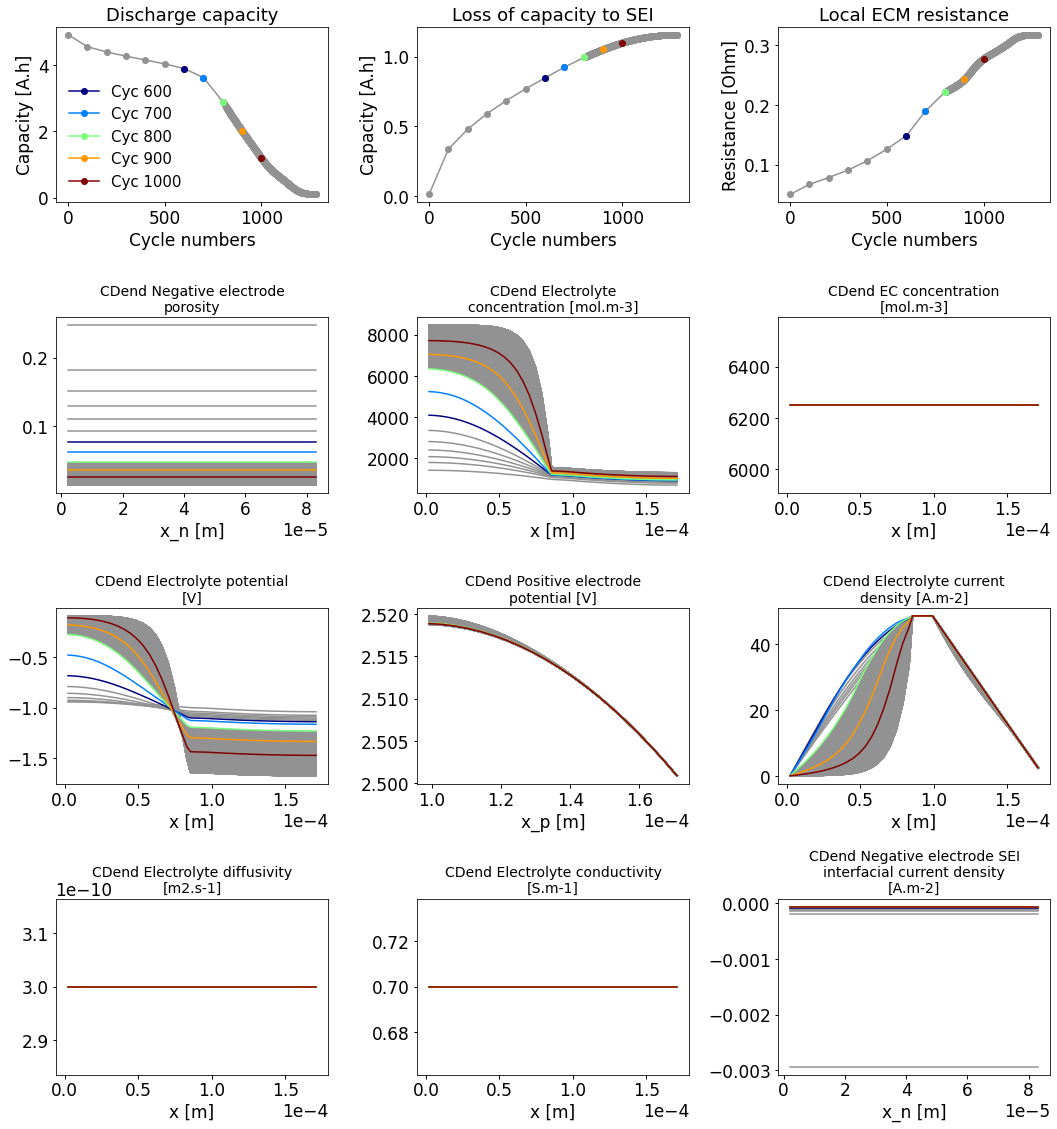

In [221]:
Index_comp = 13
key_all_CDend = [
    "CDend Negative electrode porosity",
    "CDend Electrolyte concentration [mol.m-3]",
    "CDend EC concentration [mol.m-3]",
    "CDend Electrolyte potential [V]",
    "CDend Positive electrode potential [V]",
    "CDend Electrolyte current density [A.m-2]",
    "CDend Electrolyte diffusivity [m2.s-1]",
    "CDend Electrolyte conductivity [S.m-1]",
    "CDend Negative electrode SEI interfacial current density [A.m-2]",
]
key_all_CCend = [
    "CCend Negative electrode porosity",
    "CCend Electrolyte concentration [mol.m-3]",
    "CCend EC concentration [mol.m-3]",
    "CCend Electrolyte potential [V]",
    "CCend Positive electrode potential [V]",
    "CCend Electrolyte current density [A.m-2]",
    "CCend Electrolyte diffusivity [m2.s-1]",
    "CCend Electrolyte conductivity [S.m-1]",
    "CCend Negative electrode SEI interfacial current density [A.m-2]",
]
Compare_Cycs_within_Models("Constant_sol=3e-20_2000_chi",1,key_all_CDend,"CD",[6,7,8,96,196],True)
#Compare_Models_for_Cycle(Index_comp,key_all_CCend,"CC")

In [223]:
def VolDecom_Cycs_within_Models(target,ScanNum,key_all,Title_keys,Idir,Index_List,Save):
    if Idir == 'CD':
        keys_time = "CD Time [h]"
    elif Idir == 'CC':
        keys_time = "CC Time [h]"
    else:
        print('Error')
    my_dict = HPC_Age_230105[target][str(ScanNum)]
    print(f'Compare Cycle No. {my_dict["Full_cycle"][0][Index_List[0]]} to {my_dict["Full_cycle"][0][Index_List[-1]]}')
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    Titles = ["DFN","Single","Double",]; 
    Colors    = ["r","k","b"]; Markers   = ["o","o","o"];Linestyles= ["-","-","-"];
    colormap='jet';
    if len(Index_List)<3:
        co_num = 4;
    else:
        co_num = len(Index_List)  
    gray = mpl.cm.get_cmap("gray", 8) ;cmap_i = mpl.cm.get_cmap(colormap, co_num) 

    fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
    Full_cycle = my_dict["Full_cycle"][0]; 
    k=0
    axs[0,0].plot(
        Full_cycle, 
        my_dict["Discharge capacity [A.h]"][0],
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k])
    axs[0,0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,1].plot(
        Full_cycle, 
        my_dict["CDend Loss of capacity to SEI [A.h]"][0], 
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k],  )
    axs[0,1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})
    axs[0,2].plot(
        Full_cycle, 
        my_dict["CDend Local ECM resistance [Ohm]"][0], 
        color=gray(4),marker=Markers[k],linestyle=Linestyles[k],  )
    axs[0,2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1})
    for m in range(0,len(Index_List)):
        axs[0,0].plot(
            Full_cycle[Index_List[m]], 
            my_dict["Discharge capacity [A.h]"][0][Index_List[m]],
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],
            label='Cyc '+str(Full_cycle[Index_List[m]]))
        axs[0,1].plot(
            Full_cycle[Index_List[m]], 
            my_dict["CDend Loss of capacity to SEI [A.h]"][0][Index_List[m]], 
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],  
            label='Cyc '+str(Full_cycle[Index_List[m]]))
        axs[0,2].plot(
            Full_cycle[Index_List[m]], 
            my_dict["CDend Local ECM resistance [Ohm]"][0][Index_List[m]], 
            color=cmap_i(m),marker=Markers[k],linestyle=Linestyles[k],  
            label='Cyc '+str(Full_cycle[Index_List[m]]))
    for i in range(0,3):
        axs[0,i].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[0,i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    count_i = 0; 
    for i in range(1,3):
        for j in range(0,3):
            key_ij = key_all[count_i]; count_i += 1
            for k in range(0,L_Num): # plot background
                if k in Index_List:
                    pass; # print(k)
                else:
                    axs[i,j].plot(
                        my_dict[keys_time][0][k][0],
                        my_dict[key_ij][0][k][0],
                        '-',color=gray(4),)
            for k in range(0,len(Index_List)): # plot main focus
                axs[i,j].plot(
                    my_dict[keys_time][0][Index_List[k]][0],
                    my_dict[key_ij][0][Index_List[k]][0],
                    '-',color=cmap_i(k),
                    label='Cyc '+str(Full_cycle[Index_List[k]]))
            #print(count_i-1,Title_keys[count_i-1])
            axs[i,j].set_title(
                Title_keys[count_i-1],   
                fontdict={'family':'DejaVu Sans','size':fs-3})
            axs[i,j].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_xlabel(keys_time,   fontdict={'family':'DejaVu Sans','size':fs})
            axs[i,j].set_ylim(-0.8,0.1)
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].ticklabel_format( 
                axis='x', style='sci',scilimits=[-0.01,0.01], 
                useOffset=None, useLocale=None, useMathText=None)  
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[1,0].set_ylim(2.49,4.2)

    if Save == True:
        plt.savefig(
            BasicPath  + target
            + 'VolDecom_Cycs_within_Models for scan No.' + str(ScanNum)
            + ' from Cyc'  + str(Full_cycle[Index_List[0]]) 
            + ' to ' + str(Full_cycle[Index_List[-1]]) + '.png')
    else:
        pass


Compare Cycle No. 600 to 1000


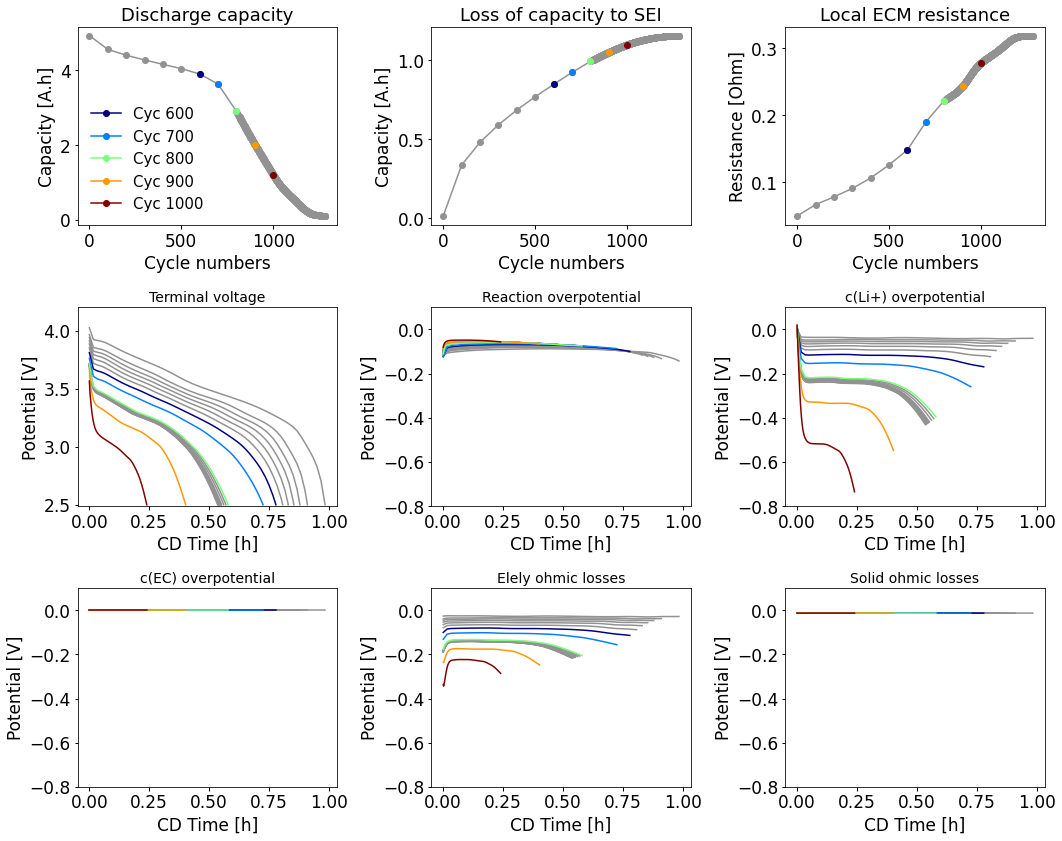

In [224]:
Keys_t_var_CD = [
    "CD Terminal voltage [V]",
    "CD X-averaged battery reaction overpotential [V]",
    "CD X-averaged battery concentration overpotential [V]",
    "CD X-averaged EC concentration overpotential [V]", 
    "CD X-averaged battery electrolyte ohmic losses [V]",
    "CD X-averaged battery solid phase ohmic losses [V]",
]
Title_keys = [
    "Terminal voltage",
    "Reaction overpotential",
    "c(Li+) overpotential",
    "c(EC) overpotential",
    "Elely ohmic losses",
    "Solid ohmic losses"
]
VolDecom_Cycs_within_Models("Constant_sol=3e-20_2000_chi",1,Keys_t_var_CD,Title_keys,"CD",[6,7,8,96,196],True)
